# Get Planck MCMC parameter Covariance Matrices and Process into Fisher matrices

In [47]:
# load the data
planckDir = 'Planck_data/'

covmatFile1 = 'base_plikHM_EE_lowTEB.covmat'
paramNamesFile1 = 'base_plikHM_EE_lowTEB.paramnames'
covmatFile2 = 'base_plikHM_EE.covmat'
paramNamesFile2 = 'base_plikHM_EE.paramnames'
covmatFile3 = 'base_plikHM_TTTEEE_lowTEB.covmat'
paramNamesFile3 = 'base_plikHM_TTTEEE_lowTEB.paramnames'

# data from pages:
# https://wiki.cosmos.esa.int/planckpla2015/index.php/Cosmological_Parameters
# http://pla.esac.esa.int/pla/#cosmology

covmat1 = np.loadtxt(planckDir+covmatFile1)
text_file = open(planckDir+paramNamesFile1, "r")
paramNames1 = text_file.readlines()
#print paramNames1
print len(paramNames1)
text_file.close()

covmat2 = np.loadtxt(planckDir+covmatFile2)
text_file = open(planckDir+paramNamesFile2, "r")
paramNames2 = text_file.readlines()
#print paramNames2
print len(paramNames2)
text_file.close()

covmat3 = np.loadtxt(planckDir+covmatFile3)
text_file = open(planckDir+paramNamesFile3, "r")
paramNames3 = text_file.readlines()
#print paramNames3
print len(paramNames3)
text_file.close()

for lineNum in range(13):
    print 'line ',lineNum,': ',paramNames1[lineNum], \
                  '        : ',paramNames2[lineNum], \
                  '        : ',paramNames2[lineNum]

59
57
82
line  0 :  omegabh2	\Omega_b h^2
        :  omegabh2	\Omega_b h^2
        :  omegabh2	\Omega_b h^2

line  1 :  omegach2	\Omega_c h^2
        :  omegach2	\Omega_c h^2
        :  omegach2	\Omega_c h^2

line  2 :  theta	100\theta_{MC}
        :  theta	100\theta_{MC}
        :  theta	100\theta_{MC}

line  3 :  tau	\tau
        :  tau	\tau
        :  tau	\tau

line  4 :  logA	{\rm{ln}}(10^{10} A_s)
        :  logA	{\rm{ln}}(10^{10} A_s)
        :  logA	{\rm{ln}}(10^{10} A_s)

line  5 :  ns	n_s
        :  ns	n_s
        :  ns	n_s

line  6 :  calPlanck	y_{\rm cal}
        :  galfEE100	A^{{\rm dust}EE}_{100}
        :  galfEE100	A^{{\rm dust}EE}_{100}

line  7 :  galfEE100	A^{{\rm dust}EE}_{100}
        :  galfEE100143	A^{{\rm dust}EE}_{100\times 143}
        :  galfEE100143	A^{{\rm dust}EE}_{100\times 143}

line  8 :  galfEE100143	A^{{\rm dust}EE}_{100\times 143}
        :  galfEE100217	A^{{\rm dust}EE}_{100\times 217}
        :  galfEE100217	A^{{\rm dust}EE}_{100\times 217}

line  9

In [48]:
# get indices of interest from the above output
print 'covmat1 shape: ', covmat1.shape
print 'covmat2 shape: ', covmat2.shape
print 'covmat3 shape: ', covmat3.shape

# covariance matrix is only 20x20.  If I use this then I'll have to use theta_mc instead of H0.
selectIndices = [0,1,2,4,5,3] # used later to put them in order compatible with my Fij
print 'covmat1: ',[paramNames1[si] for si in selectIndices]
print 'covmat2: ',[paramNames2[si] for si in selectIndices]
print 'covmat3: ',[paramNames3[si] for si in selectIndices]



covmat1 shape:  (13, 13)
covmat2 shape:  (13, 13)
covmat3 shape:  (33, 33)
covmat1:  ['omegabh2\t\\Omega_b h^2\n', 'omegach2\t\\Omega_c h^2\n', 'theta\t100\\theta_{MC}\n', 'logA\t{\\rm{ln}}(10^{10} A_s)\n', 'ns\tn_s\n', 'tau\t\\tau\n']
covmat2:  ['omegabh2\t\\Omega_b h^2\n', 'omegach2\t\\Omega_c h^2\n', 'theta\t100\\theta_{MC}\n', 'logA\t{\\rm{ln}}(10^{10} A_s)\n', 'ns\tn_s\n', 'tau\t\\tau\n']
covmat3:  ['omegabh2\t\\Omega_b h^2\n', 'omegach2\t\\Omega_c h^2\n', 'theta\t100\\theta_{MC}\n', 'logA\t{\\rm{ln}}(10^{10} A_s)\n', 'ns\tn_s\n', 'tau\t\\tau\n']


In [49]:
# fix the nuissance parameters

# invert covariance matrices
invCov1 = np.linalg.inv(covmat1)
invCov2 = np.linalg.inv(covmat2)
invCov3 = np.linalg.inv(covmat3)

# print shapes and diagonals
print invCov1.shape
print invCov2.shape
print invCov3.shape
print np.array([invCov1[si,si] for si in selectIndices])
print np.array([invCov2[si,si] for si in selectIndices])
print np.array([invCov3[si,si] for si in selectIndices])

#subInvCov = [invCov[si1][si2] for si1 in selectIndices for si2 in selectIndices]
#subInvCov = [[invCov[:,si1] for si1 in selectIndices[si2]] for si2 in selectIndices]
#subInvCov1 = [invCov[si1] for si1 in selectIndices]
#print subInvCov1
#subInvCov = [subInvCov1[:,si2] for si2 in selectIndices]

nParams = selectIndices.__len__()
subInvCov1 = np.empty((nParams,nParams))
subInvCov2 = np.empty((nParams,nParams))
subInvCov3 = np.empty((nParams,nParams))
# pull out the parameters indicated in selectIndices in order indicated there
for si1 in range(6):
    for si2 in range(6):
        subInvCov1[si1,si2] = invCov1[selectIndices[si1],selectIndices[si2]]
        subInvCov2[si1,si2] = invCov2[selectIndices[si1],selectIndices[si2]]
        subInvCov3[si1,si2] = invCov3[selectIndices[si1],selectIndices[si2]]
#print subInvCov
print np.diag(subInvCov1)
print np.diag(subInvCov2)
print np.diag(subInvCov3)

(13, 13)
(13, 13)
(33, 33)
[14392681.1929545   1049528.32399962  1437035.41942155    46769.37259216
    15165.26890736   189447.056113  ]
[1.43899404e+07 1.08746731e+06 1.38833734e+06 4.72009326e+04
 1.22552384e+04 1.90637457e+05]
[93644638.67707175  4268555.25616327 14958494.88509028   804119.32282487
   369396.33712423  3204935.51385855]
[14392681.1929545   1049528.32399962  1437035.41942155    46769.37259216
    15165.26890736   189447.056113  ]
[1.43899404e+07 1.08746731e+06 1.38833734e+06 4.72009326e+04
 1.22552384e+04 1.90637457e+05]
[93644638.67707175  4268555.25616327 14958494.88509028   804119.32282487
   369396.33712423  3204935.51385855]


In [50]:
# get desired combinations before finding sigmas
"""
covmatFile1 = 'base_plikHM_EE_lowTEB.covmat'
paramNamesFile1 = 'base_plikHM_EE_lowTEB.paramnames'
covmatFile2 = 'base_plikHM_EE.covmat'
paramNamesFile2 = 'base_plikHM_EE.paramnames'
covmatFile3 = 'base_plikHM_TTTEEE_lowTEB.covmat'
paramNamesFile3 = 'base_plikHM_TTTEEE_lowTEB.paramnames'
"""
Fij_plikHM_EE_lowTEB = subInvCov1
Fij_plikHM_EE = subInvCov2
Fij_plikHM_TTTEEE_lowTEB = subInvCov3

Fij_plikHM_lowTEB = Fij_plikHM_EE_lowTEB - Fij_plikHM_EE

In [51]:
# re-invert and get sigmas
getSigmas = lambda Fij: np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_TTTEEE_lowTEB = getSigmas(Fij_plikHM_TTTEEE_lowTEB)
sigmas_lowTEB = getSigmas(Fij_plikHM_lowTEB)
print sigmas_TTTEEE_lowTEB
print sigmas_lowTEB

[0.00013805 0.00139624 0.00032041 0.03085309 0.00389213 0.01601033]
[0.00315051 0.00444641 0.00440098 0.01898294 0.01669401 0.02325072]


In [52]:
# save that sub-Fisher matrix to use in another notebook
# I will want it in "Rebuild covar with noise"
#np.savetxt('PlanckInvCovFromMCMC.txt',subInvCov)
np.savetxt('Planck_TTTEEE_lowTEB_FromMCMC.txt',Fij_plikHM_TTTEEE_lowTEB)
np.savetxt('Planck_lowTEB_FromMCMC.txt',Fij_plikHM_lowTEB)

# Transform to H0 parameter via Jacobian

In [53]:
# can I get a jacobian to translate theta_mc to H0?
# yes.  Use discrete derivative with CAMB.  
# dtheta/dparams vector below from notebook "Rebuild covar with noise"

In [54]:
# first need to convert 100*theta_MC to theta_MC
mcIndex = 2
mcFac = 100
Fij_plikHM_TTTEEE_lowTEB[:,mcIndex] *= mcFac
Fij_plikHM_TTTEEE_lowTEB[mcIndex,:] *= mcFac
Fij_plikHM_lowTEB[:,mcIndex] *= mcFac
Fij_plikHM_lowTEB[mcIndex,:] *= mcFac

In [55]:
#dtheta/dparams
nCosParams = 6
# paramList after transforming to (H0, 10^9 As) from (cosmomc_theta, ln(10^10*As) )
paramList = ['ombh2','omch2','H0','10^9 As','ns','tau'] 
dthetas = [-0.024833399132992862, 0.010457065703734872, 2.9621955038288544e-05, 0.0, 0.0, 0.0]

# The only derivatives in the Jacobian are on the dtheta/dparam row.
mcIndex = 2
jacobian = np.diag(np.ones(nCosParams))
jacobian[mcIndex,:] = dthetas#*100
#jacobian[:,mcIndex] = dthetas#*100

# multiply these all by d{100thetamc}/d{thetamc} = 100
#jacobian[mcIndex,:] *= 100
#jacobian[:,mcIndex] *= 100

print jacobian

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.48333991e-02  1.04570657e-02  2.96219550e-05  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [56]:
# jacobian-it-up
Fij_plikHM_TTTEEE_lowTEB = np.dot(jacobian.T,np.dot(Fij_plikHM_TTTEEE_lowTEB,jacobian))
Fij_plikHM_lowTEB = np.dot(jacobian.T,np.dot(Fij_plikHM_lowTEB,jacobian))

#print Fij_plikHM_TTTEEE_lowTEB
#print Fij_plikHM_lowTEB

# Transform to $10^9 As$ via Jacobian

In [57]:
# only one partial derivative needed
# d( ln(10^10*As)) / d(10^9*As) = 1/(10^9*As)*d(10*10^9*As)/d(10^9*As) = 1/(10^9*As)
TenToTheNineAs_fid = 2.2
AsIndex = 3
Fij_plikHM_TTTEEE_lowTEB[:,AsIndex] *= 1/TenToTheNineAs_fid
Fij_plikHM_TTTEEE_lowTEB[AsIndex,:] *= 1/TenToTheNineAs_fid
Fij_plikHM_lowTEB[:,AsIndex] *= 1/TenToTheNineAs_fid
Fij_plikHM_lowTEB[AsIndex,:] *= 1/TenToTheNineAs_fid

# Load  FisherMatrix objects that have the CMB-S4 fiducial parameters for combination with this result

In [58]:
# load saved Fobj
import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

#filehandler = open('Fisher_7_6X4_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#filehandler = open('Fisher_7_6X4n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05; X2n version has noise included

#filehandler = open('Fisher_7_6X2_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2_w2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#filehandler = open('Fisher_7_6X2n.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05; X2n version has noise included

# this one has TE polarazation to l=5000, but only one galaxy bin
filehandler = open('Fisher_4_1Yn.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000; nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# this one used fiducial params and values to match CMB-S4 Science book verification table 8.1

# this on like the Yn version but uses 'total' rather than 'unlensed' power spectra
#filehandler = open('Fisher_4_1Zn.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000; nz=3e5; nonlinear=True,
#neutrino_hierarchy='normal', usePrimaryCMB=True, nMapsP=3, useNoise=True; myClName='total'; 
#from FisherCl branch quickCl
# this one used fiducial params and values to match CMB-S4 Science book verification table 8.1

Fobj = pickle.load(filehandler) 

print Fobj.paramList
print Fobj.cosParams

['ombh2', 'omch2', 'H0', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1']
{'cosmomc_theta': None, 'r': 0, 'kPivot': 0.05, 'omk': 0, 'H0': 69.0, 'mnu': 0.06, 'nnu': 3.046, 'tau': 0.06, 'neutrino_hierarchy': 'normal', 'standard_neutrino_neff': 3.046, 'As': 2.2e-09, 'omch2': 0.12, 'w': -1.0, 'num_massive_neutrinos': 1, 'ns': 0.966, 'ombh2': 0.0222}


# break from the main point of this notebook for a moment to check the primary CMB Cls

In [59]:
crossClsP = Fobj.crossClsP
#crossClsP = Fobj.crossClsPPlus[:,:,0,:]
print crossClsP.shape
#print Fobj.fieldNamesP
print Fobj.obsNamesP

(2, 2, 4999)
['TT', 'TE', 'EE']


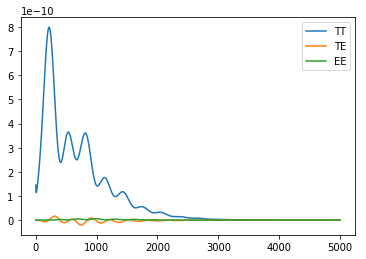

In [60]:
# plot them
ellsP = Fobj.ellsP

plt.plot(ellsP,crossClsP[0,0],label='TT')
plt.plot(ellsP,crossClsP[0,1],label='TE')
plt.plot(ellsP,crossClsP[1,1],label='EE')
plt.legend()
plt.show()


In [61]:
# the familiar shape of Cl^TT here shows that it really is Dl=ell*(ell+1)*Cl/2pi

In [62]:
# convert the Dl to Cl in crossCls, the re-compute everything that follows from it
DlFac = ellsP*(ellsP+1)/(2*np.pi)
crossClsMod = crossClsP/DlFac
print crossClsMod.shape

(2, 2, 4999)


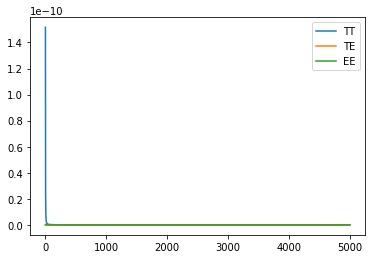

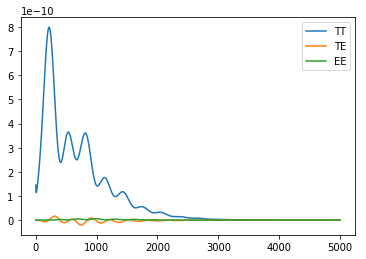

In [63]:
# plot them
ellsP = Fobj.ellsP

plt.plot(ellsP,crossClsMod[0,0],label='TT')
plt.plot(ellsP,crossClsMod[0,1],label='TE')
plt.plot(ellsP,crossClsMod[1,1],label='EE')
plt.legend()
plt.show()

plt.plot(ellsP,crossClsMod[0,0]*DlFac,label='TT')
plt.plot(ellsP,crossClsMod[0,1]*DlFac,label='TE')
plt.plot(ellsP,crossClsMod[1,1]*DlFac,label='EE')
plt.legend()
plt.show()


In [64]:
# now, are the units for Cl and Nl compatible?
# sensitivities given in units of microK-arcmin should be converted to microK-radian for microK^2 Cl

# convert unitless spectra to microK^2
TCMB = 2.7260 #Fixsen
crossClsMod *=(TCMB*1e6)**2

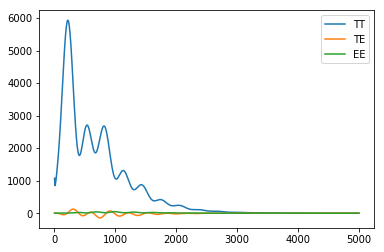

In [65]:
plt.plot(ellsP,crossClsMod[0,0]*DlFac,label='TT')
plt.plot(ellsP,crossClsMod[0,1]*DlFac,label='TE')
plt.plot(ellsP,crossClsMod[1,1]*DlFac,label='EE')
plt.legend()
plt.show()


In [66]:
# grab some FisherCl
import noiseCl as ncl

#arcminPerRad = 60*180/np.pi

print 'getting (primary CMB) detector noise...'
fwhm = 1; ST = 1; SP = ST*1.414
#fwhm = 2; ST = 1; SP = ST*1.414
#ST /= arcminPerRad; SP /= arcminPerRad
noiseCMBS4_TT1 = ncl.noisePower(ST,ST,fwhm,ellsP)
noiseCMBS4_PP1 = ncl.noisePower(SP,SP,fwhm,ellsP)

# shape like crossCls
noiseClsP = np.zeros(crossClsP.shape)
noiseClsP[0,0] = noiseCMBS4_TT1
noiseClsP[1,1] = noiseCMBS4_PP1


getting (primary CMB) detector noise...


In [67]:
# also scale crossClsPPlus, crossClsPMinus, dClVecsP
crossClsPPlus = Fobj.crossClsPPlus*(TCMB*1e6)**2/DlFac
crossClsPMinus = Fobj.crossClsPMinus*(TCMB*1e6)**2/DlFac
dClVecsP = Fobj.dClVecsP*(TCMB*1e6)**2/DlFac

In [68]:
# insert these into Fobj and make covar
Fobj.crossClsP = crossClsMod
Fobj.noiseClsP = noiseClsP
Fobj.crossClsPPlus = crossClsPPlus
Fobj.crossClsPMinus = crossClsPMinus
Fobj.dClVecsP = dClVecsP

Fobj.covarP,Fobj.invCovP,Fobj.ellsP,Fobj.obsListP = \
            Fobj.makeCovar(Fobj.crossClsP,Fobj.noiseClsP,Fobj.lminP,Fobj.lmaxP)

starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 


In [69]:
# make Fisher matrices
Fobj.FijTE = Fobj.makeFisher(Fobj.lminP,TE=True)
#FijTE = Fobj.makeFisher(30,TE=True)

adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lm

In [70]:
# make a similar adjustment for Nl^kk
# grab some FisherCl
import crosspower as cp

print 'creating noise arrays... '

print 'getting (EB) lensing reconstruction noise... '
# noise levels from a possible CMB-S4 design:
nlev_t     = 1.   # temperature noise level, in uK.arcmin.
nlev_p     = 1.414   # polarization noise level, in uK.arcmin.
beam_fwhm  = 1.   # Gaussian beam full-width-at-half-maximum.

#beam_fwhm  = 2.   # Gaussian beam full-width-at-half-maximum.
#beam_fwhm  = 4.   # Gaussian beam full-width-at-half-maximum. 
#From Hu & Okamoto's "near-perfect" experiment

ells,EB_noise = ncl.getRecNoise(Fobj.lmax,nlev_t,nlev_p,beam_fwhm)

# convert Nl^dd to Nl^kk
# this formula is a reasonable guess based on Fourier analog.
Nlkk = EB_noise * ells*(ells+1)/4

print 'getting galaxy shot noise... '
# From Schaan et. al.: LSST n_source = 26/arcmin^2 for full survey
#nbar = 26 # arcmin^-2
nbar = 66 # 66 arcmin^-2 to match Bye's value

# the selection of beesBins must be consistent with that which is selected in cp.tophat
#beesBins = True
beesBins = False
if beesBins:
    binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
    nBins = 6
else:
    binEdges = np.linspace(Fobj.zmin,Fobj.zmax,Fobj.nBins+1)
    nBins = Fobj.nBins

# the selection of dndz function must be consistent with that which is selected in cp.getDNDZinterp
# myDNDZ must be a function only of z
#myDNDZ = lambda z: cp.modelDNDZ(z,z0)
myDNDZ = lambda z: cp.modelDNDZ3(z,Fobj.z0)

N_gg = ncl.shotNoise(nbar,binEdges,myDNDZ=myDNDZ)



# create noiseCls array to accompany crossCls: 
#  Nl^kk will be reconstruction noise
#  Nl^gigi will be shot noise
#  Nl^kg, Nl^gigj are zero because noise is uncorrelated
noiseCls = np.zeros(Fobj.crossCls.shape)
noiseCls[0,0] = Nlkk[Fobj.lmin:Fobj.lmax+1]
for binNum in range(nBins):
    noiseCls[binNum+1,binNum+1] = N_gg[binNum]*np.ones(Fobj.lmax-Fobj.lmin+1)


creating noise arrays... 
getting (EB) lensing reconstruction noise... 
[00:00:00] calculating full-sky noise level for estimator of type <class 'quicklens.qest.lens.phi_EB'>
getting galaxy shot noise... 


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:52: ComplexWarning: Casting complex values to real discards the imaginary part


In [71]:
# put into Fobj and make covar
Fobj.noiseCls = noiseCls

Fobj.covar,Fobj.invCov,Fobj.ells,Fobj.obsList = \
        Fobj.makeCovar(Fobj.crossCls,Fobj.noiseCls,Fobj.lmin,Fobj.lmax)
    

starting covariance set  1  of  2 ... 
starting covariance set  2  of  2 ... 


# Back to our regularly scheduled programming

In [72]:
# get TE fisher
myLmin = 30
myFij = Fobj.makeFisher(myLmin,TE=True)

# fix w, mnu 
# nCosParams should be 6 to fix w, mnu
Fij_S4_TE = myFij[:nCosParams,:nCosParams] 
Fij_plikHM_lowTEB = Fij_plikHM_lowTEB[:nCosParams,:nCosParams]
Fij_plikHM_TTTEEE_lowTEB = Fij_plikHM_TTTEEE_lowTEB[:nCosParams,:nCosParams]
print Fij_S4_TE.shape, Fij_plikHM_lowTEB.shape, Fij_plikHM_TTTEEE_lowTEB.shape

# convert As to 10^9 As
Fij_S4_TE[:,AsIndex] *= 1e-9
Fij_S4_TE[AsIndex,:] *= 1e-9

# combine using appropriate fsky weighting
fsky_S4 = 0.4
fsky_Pl = 0.2 # this is in addition to area covered by S4

# fsky is in denominator of covariance matrix, putting it in numerator of Fij matrix
Fij_Sum = (Fij_S4_TE+Fij_plikHM_lowTEB)*fsky_S4 + Fij_plikHM_TTTEEE_lowTEB*fsky_Pl
Fij_Sum_Pl = Fij_plikHM_TTTEEE_lowTEB*(fsky_S4+fsky_Pl)

adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lmax for TT... 
adjusting lm

In [73]:
# add sigma = 0.01 prior on tau
tauIndex = 5
tauPrior = 1/0.01**2
Fij_Sum[tauIndex,tauIndex] += tauPrior
Fij_Sum_Pl[tauIndex,tauIndex] += tauPrior

In [74]:
# get sigmas
sigmas_Sum = getSigmas(Fij_Sum)
sigmas_Sum_Pl = getSigmas(Fij_Sum_Pl)

In [75]:
# one more conversion before printout and comparison
ombh2Fac = 100
sigmas_Sum[0] *= ombh2Fac
sigmas_Sum_Pl[0] *= ombh2Fac
paramList[0] = '100 ombh2'

In [76]:
# show sigmas
from prettytable import PrettyTable

print 'Planck only and Planck+CMB-S4'
t = PrettyTable(['Parameter', 'Planck','S4+Planck'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_Sum_Pl[i]
    Bi = sigmas_Sum[i]
    #diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi] )
print t

Planck only and Planck+CMB-S4
+-----------+---------+-----------+
| Parameter |  Planck | S4+Planck |
+-----------+---------+-----------+
| 100 ombh2 |  0.0174 |   0.0025  |
|   omch2   | 0.00171 |  0.000712 |
|     H0    |  0.759  |   0.286   |
|  10^9 As  |  0.0393 |   0.0407  |
|     ns    |  0.0048 |  0.00196  |
|    tau    |  0.009  |  0.00922  |
+-----------+---------+-----------+


In [77]:
# print out with CMB-S4 table 8.1 values
sigmas_S4book_Planck = [0.017,0.0014,0.7,0.039,0.004,0.01]
sigmas_S4book_PlanckS4 = [0.003,0.0006,0.24,0.021,0.002,0.006]

t = PrettyTable(['Parameter','Planck_book', 'Planck_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum_Pl[i]
    Zi = sigmas_S4book_Planck[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

t = PrettyTable(['Parameter','S4+Planck_book', 'S4+Planck_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum[i]
    Zi = sigmas_S4book_PlanckS4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

+-----------+-------------+----------+--------+
| Parameter | Planck_book | Planck_Z | % diff |
+-----------+-------------+----------+--------+
| 100 ombh2 |    0.017    |  0.0174  |  2.61  |
|   omch2   |    0.0014   | 0.00171  |  21.8  |
|     H0    |      0.7    |  0.759   |  8.38  |
|  10^9 As  |    0.039    |  0.0393  |  0.69  |
|     ns    |    0.004    |  0.0048  |  20.1  |
|    tau    |     0.01    |  0.009   | -9.98  |
+-----------+-------------+----------+--------+
+-----------+----------------+-------------+--------+
| Parameter | S4+Planck_book | S4+Planck_Z | % diff |
+-----------+----------------+-------------+--------+
| 100 ombh2 |     0.003      |    0.0025   | -16.6  |
|   omch2   |     0.0006     |   0.000712  |  18.7  |
|     H0    |      0.24      |    0.286    |  19.1  |
|  10^9 As  |     0.021      |    0.0407   |  93.6  |
|     ns    |     0.002      |   0.00196   | -1.87  |
|    tau    |     0.006      |   0.00922   |  53.7  |
+-----------+----------------+----

# that was without kappa.  Now get kappa into the S4 part

In [78]:
print Fobj.covar.shape
print Fobj.dClVecs.shape
print Fobj.lmin,Fobj.lmax

(3, 3, 2999)
(3, 9, 2999)
2 3000


In [79]:
# make kk fisher with noise
nCosParams = Fobj.nCosParams
dClkk = Fobj.dClVecs[0] # the dCl/dkk part
cov_kk2 = Fobj.covar[0,0] # the kk part
Fij_kk2 = np.zeros((nCosParams,nCosParams))
minEllInd = myLmin-Fobj.lmin  # eg. 30-2
for pNum1 in range(nCosParams):
    for pNum2 in range(pNum1,nCosParams):
        # the next line does the summation over ell
        Fij_kk2[pNum1,pNum2] = np.sum(dClkk[pNum1,minEllInd:]*dClkk[pNum2,minEllInd:]/cov_kk2[minEllInd:])
        Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
print 'parameters: ',Fobj.paramList[:nCosParams]
print 'kappa-only, noise-included Fisher matrix:'
print Fij_kk2

parameters:  ['ombh2', 'omch2', 'H0', 'As', 'ns', 'tau', 'mnu', 'w']
kappa-only, noise-included Fisher matrix:
[[ 1.42206889e+09 -1.58420001e+09  8.98451527e+05 -4.55824080e+16
  -1.16209723e+08  2.51574140e+05  2.62964188e+07  3.69206028e+07]
 [-1.58420001e+09  1.76520321e+09 -1.00131934e+06  5.08187823e+16
   1.29261301e+08 -2.80174719e+05 -2.93128138e+07 -4.11520360e+07]
 [ 8.98451527e+05 -1.00131934e+06  5.68266873e+02 -2.88532688e+13
  -7.30323351e+04  1.58439597e+02  1.66376565e+04  2.33534966e+04]
 [-4.55824080e+16  5.08187823e+16 -2.88532688e+13  1.46614355e+24
   3.69042144e+15 -8.02590267e+12 -8.45136302e+14 -1.18592061e+15]
 [-1.16209723e+08  1.29261301e+08 -7.30323351e+04  3.69042144e+15
   9.80918158e+06 -2.10753653e+04 -2.13467173e+06 -3.00251394e+06]
 [ 2.51574140e+05 -2.80174719e+05  1.58439597e+02 -8.02590267e+12
  -2.10753653e+04  4.56985488e+01  4.63891840e+03  6.51963222e+03]
 [ 2.62964188e+07 -2.93128138e+07  1.66376565e+04 -8.45136302e+14
  -2.13467173e+06  4.6389

In [80]:
# convert As to 10^9 As
Fij_kk2[:,AsIndex] *= 1e-9
Fij_kk2[AsIndex,:] *= 1e-9

# fix w, mnu
Fij_kk2 = Fij_kk2[:6,:6]

# get sigmas
sigmas_Sum2 = getSigmas(Fij_Sum+Fij_kk2*fsky_S4)

# one more conversion before printout and comparison
sigmas_Sum2[0] *= ombh2Fac

In [81]:
# show sigmas
from prettytable import PrettyTable

print 'Planck only and Planck+CMB-S4'
t = PrettyTable(['Parameter', 'Planck','S4+Planck'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_Sum_Pl[i]
    Bi = sigmas_Sum2[i]
    #diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi] )
print t

Planck only and Planck+CMB-S4
+-----------+---------+-----------+
| Parameter |  Planck | S4+Planck |
+-----------+---------+-----------+
| 100 ombh2 |  0.0174 |  0.00229  |
|   omch2   | 0.00171 |  0.00055  |
|     H0    |  0.759  |   0.219   |
|  10^9 As  |  0.0393 |   0.0205  |
|     ns    |  0.0048 |  0.00172  |
|    tau    |  0.009  |  0.00543  |
+-----------+---------+-----------+


In [82]:
# print out with CMB-S4 table 8.1 values
sigmas_S4book_Planck = [0.017,0.0014,0.7,0.039,0.004,0.01]
sigmas_S4book_PlanckS4 = [0.003,0.0006,0.24,0.021,0.002,0.006]

t = PrettyTable(['Parameter','Planck_book', 'Planck_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum_Pl[i]
    Zi = sigmas_S4book_Planck[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

t = PrettyTable(['Parameter','S4+Planck_book', 'S4+Planck_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum2[i]
    Zi = sigmas_S4book_PlanckS4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

+-----------+-------------+----------+--------+
| Parameter | Planck_book | Planck_Z | % diff |
+-----------+-------------+----------+--------+
| 100 ombh2 |    0.017    |  0.0174  |  2.61  |
|   omch2   |    0.0014   | 0.00171  |  21.8  |
|     H0    |      0.7    |  0.759   |  8.38  |
|  10^9 As  |    0.039    |  0.0393  |  0.69  |
|     ns    |    0.004    |  0.0048  |  20.1  |
|    tau    |     0.01    |  0.009   | -9.98  |
+-----------+-------------+----------+--------+
+-----------+----------------+-------------+--------+
| Parameter | S4+Planck_book | S4+Planck_Z | % diff |
+-----------+----------------+-------------+--------+
| 100 ombh2 |     0.003      |   0.00229   | -23.5  |
|   omch2   |     0.0006     |   0.00055   | -8.35  |
|     H0    |      0.24      |    0.219    | -8.75  |
|  10^9 As  |     0.021      |    0.0205   | -2.42  |
|     ns    |     0.002      |   0.00172   | -13.8  |
|    tau    |     0.006      |   0.00543   | -9.47  |
+-----------+----------------+----

# Next try with CosmicFish results

In [83]:
cfDir = 'cosmicfish_results/'
FijFilename = '3_CMBS4_TEB_fisher_matrix_cls.dat'  # TEB only

# The parameters of this Fisher matrix are:
#
#    1    omegabh2    \Omega_b h^2       0.2220000000000000E-01
#    2    omegach2    \Omega_c h^2       0.1200000000000000E+00
#    3    h    h       0.6900000000000001E+00
#    4    logA    {\rm{ln}}(10^{10} A_s)       0.3091042453358316E+01
#    5    ns    n_s       0.9660000000000000E+00
#    6    tau    \tau       0.6000000000000000E-01
#

Fij_CF = np.loadtxt(cfDir+FijFilename)
print Fij_CF

[[ 4.30400590e+09 -6.59605228e+08 -1.95219475e+08  7.37773638e+07
   9.94588306e+07 -1.42641941e+08]
 [-6.59605228e+08  2.06770781e+08  5.40309866e+07 -1.12167620e+07
  -1.24332342e+07  2.26744356e+07]
 [-1.95219475e+08  5.40309866e+07  1.54081445e+07 -3.36576138e+06
  -3.86681499e+06  6.28546909e+06]
 [ 7.37773638e+07 -1.12167620e+07 -3.36576138e+06  3.44653161e+06
   3.14441968e+06 -6.42453437e+06]
 [ 9.94588306e+07 -1.24332342e+07 -3.86681499e+06  3.14441968e+06
   3.66513392e+06 -5.99246391e+06]
 [-1.42641941e+08  2.26744356e+07  6.28546909e+06 -6.42453437e+06
  -5.99246391e+06  1.22193648e+07]]


# Transform to $10^9 As$ via Jacobian

In [84]:
# only one partial derivative needed
# d( ln(10^10*As)) / d(10^9*As) = 1/(10^9*As)*d(10*10^9*As)/d(10^9*As) = 1/(10^9*As)
TenToTheNineAs_fid = 2.2
AsIndex = 3
Fij_CF[:,AsIndex] *= 1/TenToTheNineAs_fid
Fij_CF[AsIndex,:] *= 1/TenToTheNineAs_fid

# Transform to $H_0$ via Jacobian

In [85]:
# d(h)/d(100h) = 1/100
HIndex = 2
Fij_CF[:,HIndex] /= 100
Fij_CF[HIndex,:] /= 100

In [86]:
# get sigmas
getSigmas = lambda Fij: np.sqrt(np.diag(np.linalg.inv(Fij)))
sigmas_CosmicFish = getSigmas(Fij_CF)
print sigmas_CosmicFish

[3.83938345e-05 8.56005710e-04 3.23719005e-01 2.75374827e-02
 2.48307919e-03 7.44515332e-03]


In [87]:
# combine with others
# fsky is in denominator of covariance matrix, putting it in numerator of Fij matrix
#Fij_Sum = (Fij_S4_TE+Fij_plikHM_lowTEB)*fsky_S4 + Fij_plikHM_TTTEEE_lowTEB*fsky_Pl
#Fij_Sum_Pl = Fij_plikHM_TTTEEE_lowTEB*(fsky_S4+fsky_Pl)

# fsky already applied to Fij_CF
Fij_Sum_CF = Fij_CF + Fij_plikHM_TTTEEE_lowTEB*fsky_Pl


In [88]:
# add sigma = 0.01 prior on tau
tauIndex = 5
tauPrior = 1/0.01**2
#Fij_Sum[tauIndex,tauIndex] += tauPrior
#Fij_Sum_Pl[tauIndex,tauIndex] += tauPrior

Fij_Sum_CF[tauIndex,tauIndex] += tauPrior


# Transform to $100 \Omega_b h^2$ via Jacobian

In [89]:
# d(ombh2)/d(100obmh2) = 1/100
ObIndex = 0
Fij_CF[:,ObIndex] /= 100
Fij_CF[ObIndex,:] /= 100

Fij_Sum_CF[:,ObIndex] /= 100
Fij_Sum_CF[ObIndex,:] /= 100

Fij_kk2[:,ObIndex] /= 100
Fij_kk2[ObIndex,:] /= 100

In [90]:
# Show the sigmas
# get sigmas
#sigmas_Sum = getSigmas(Fij_Sum)
#sigmas_Sum_Pl = getSigmas(Fij_Sum_Pl)
sigmas_Sum_CF = getSigmas(Fij_Sum_CF)

t = PrettyTable(['Parameter','Planck_book', 'Planck_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum_Pl[i]
    Zi = sigmas_S4book_Planck[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

t = PrettyTable(['Parameter','S4+Planck_book', 'S4_CF+Planck_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum_CF[i]
    Zi = sigmas_S4book_PlanckS4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t
print "This from CosmicFish with no kappa"

+-----------+-------------+----------+--------+
| Parameter | Planck_book | Planck_Z | % diff |
+-----------+-------------+----------+--------+
| 100 ombh2 |    0.017    |  0.0174  |  2.61  |
|   omch2   |    0.0014   | 0.00171  |  21.8  |
|     H0    |      0.7    |  0.759   |  8.38  |
|  10^9 As  |    0.039    |  0.0393  |  0.69  |
|     ns    |    0.004    |  0.0048  |  20.1  |
|    tau    |     0.01    |  0.009   | -9.98  |
+-----------+-------------+----------+--------+
+-----------+----------------+----------------+--------+
| Parameter | S4+Planck_book | S4_CF+Planck_Z | % diff |
+-----------+----------------+----------------+--------+
| 100 ombh2 |     0.003      |    0.00372     |  23.9  |
|   omch2   |     0.0006     |    0.000675    |  12.5  |
|     H0    |      0.24      |     0.256      |  6.84  |
|  10^9 As  |     0.021      |     0.0214     |   1.8  |
|     ns    |     0.002      |    0.00213     |   6.3  |
|    tau    |     0.006      |    0.00575     | -4.15  |
+------

In [91]:
# now add in kappa
Fij_Sum_CF_k = Fij_Sum_CF + Fij_kk2*fsky_S4
sigmas_Sum_CF_k = getSigmas(Fij_Sum_CF_k)

In [92]:
t = PrettyTable(['Parameter','Planck_book', 'Planck_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum_Pl[i]
    Zi = sigmas_S4book_Planck[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

t = PrettyTable(['Parameter','S4+Planck_book', 'S4_CF+Planck_Z+kk_Z','% diff'])
for i,p in enumerate(paramList[:nCosParams]):
    Bi = sigmas_Sum_CF_k[i]
    Zi = sigmas_S4book_PlanckS4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t

+-----------+-------------+----------+--------+
| Parameter | Planck_book | Planck_Z | % diff |
+-----------+-------------+----------+--------+
| 100 ombh2 |    0.017    |  0.0174  |  2.61  |
|   omch2   |    0.0014   | 0.00171  |  21.8  |
|     H0    |      0.7    |  0.759   |  8.38  |
|  10^9 As  |    0.039    |  0.0393  |  0.69  |
|     ns    |    0.004    |  0.0048  |  20.1  |
|    tau    |     0.01    |  0.009   | -9.98  |
+-----------+-------------+----------+--------+
+-----------+----------------+---------------------+--------+
| Parameter | S4+Planck_book | S4_CF+Planck_Z+kk_Z | % diff |
+-----------+----------------+---------------------+--------+
| 100 ombh2 |     0.003      |       0.00323       |  7.53  |
|   omch2   |     0.0006     |       0.000567      | -5.52  |
|     H0    |      0.24      |        0.212        | -11.5  |
|  10^9 As  |     0.021      |        0.0201       | -4.08  |
|     ns    |     0.002      |       0.00196       | -2.22  |
|    tau    |     0.006 